## <font color='green'> Application of Random Forest and Boosted Trees to the Classification of Web Documents
* Introduction of ensemble methods in python: https://scikit-learn.org/stable/modules/ensemble.html#ensemble

In [1]:
import os
os.chdir('')

import numpy as np
import pandas as pd
import math

# Data Preparation: 20 news group data
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer 

categories = ['alt.atheism',
        'talk.religion.misc',
        'comp.graphics',
        'sci.space']

remove = ('headers', 'footers', 'quotes')

data_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove, shuffle=True, random_state=42)
data_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove, shuffle=True, random_state=42)

Y_train, Y_test = data_train.target, data_test.target

X_train = data_train.data
X_test = data_test.data

vectorizer = TfidfVectorizer(stop_words='english')

X_train = vectorizer.fit_transform(X_train) 
X_test = vectorizer.transform(X_test)

# number of columns/ covariates
n_features = X_train.shape[1]

In [2]:
data_test.target_names

['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

### <font color='green'> 1) Random Forests
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# RandomForestRegressor for continuous 
# min sample split - how large the tree can grow - go to the pure split
# Max_features makes it a random forest
RF = RandomForestClassifier(n_estimators=1000, min_samples_split = 2, max_features = math.floor(math.sqrt(n_features)))

RFres= RF.fit(X_train, Y_train)

print(RFres.score(X_test, Y_test))
print(classification_report(Y_test, RFres.predict(X_test)))

0.7235772357723578
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       319
           1       0.82      0.88      0.85       389
           2       0.74      0.83      0.78       394
           3       0.69      0.43      0.53       251

    accuracy                           0.72      1353
   macro avg       0.71      0.69      0.69      1353
weighted avg       0.72      0.72      0.71      1353



### <font color='green'> * Relative Influence Plot
* An example: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

#### <font color='green'> i) Extract 10 most important features (words) in terms of their importance scores

In [4]:
importances = RFres.feature_importances_ # importance scores for all the words used for classification

# Sort the importance scores in ascending order and select the bottom 10 items and then reverse the list
# This involves many steps because there is no option for a descending sort in np.sort (this may be done by -np.sort(-importances))
top10v = np.sort(importances)[-10:][::-1] 
top10n = np.argsort(importances)[-10:][::-1] # Original indices for the sorted scores

feature_names = np.asarray(vectorizer.get_feature_names()) # Words used for classification by the vectorizer

print(feature_names[top10n]) # Sort feature names by the sorted order above
print(top10v)

['space' 'graphics' 'god' 'thanks' 'orbit' 'file' 'nasa' 'hi' 'religion'
 'image']
[0.01923319 0.01152274 0.00814729 0.00721828 0.00630859 0.00627605
 0.00594461 0.00566356 0.00517155 0.00516493]


#### <font color='green'> ii) Plot a bar chart

1. space (0.019233)
2. graphics (0.011523)
3. god (0.008147)
4. thanks (0.007218)
5. orbit (0.006309)
6. file (0.006276)
7. nasa (0.005945)
8. hi (0.005664)
9. religion (0.005172)
10. image (0.005165)


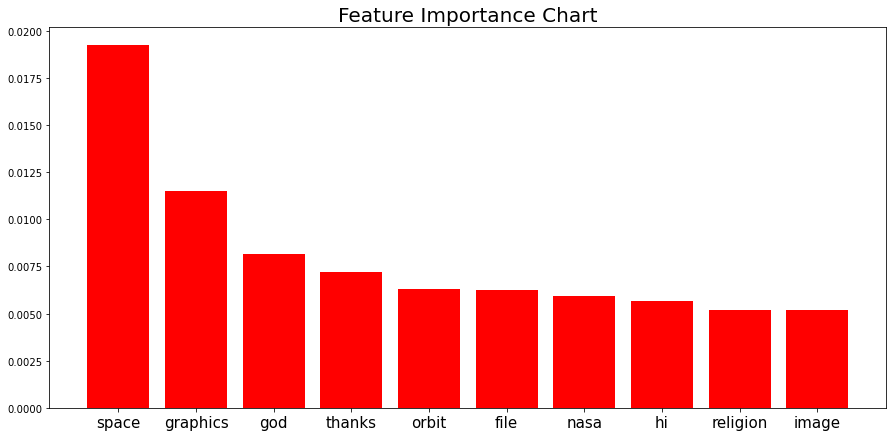

In [5]:
import matplotlib.pyplot as plt

for f in range(10):
    print("%d. %s (%f)" % (f + 1, feature_names[top10n[f]], top10v[f]))

plt.figure(figsize=(15,7))
plt.title("Feature Importance Chart",  fontsize=20)
plt.bar(feature_names[top10n], top10v, color="r")
plt.xticks(fontsize= 15)
plt.show()

### <font color='green'> 2) Boosted Trees using Gradient Boosting
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
    - $B$ : n_estimators, default=100
    - $\lambda$ : learning_rate, default=0.1
    - The (maximum) number of splits in a tree: max_depth, default=3

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.5, max_depth=2)

GBres = GB.fit(X_train, Y_train)

print(GBres.score(X_test, Y_test))
print(classification_report(Y_test, GBres.predict(X_test)))

0.7073170731707317
              precision    recall  f1-score   support

           0       0.59      0.57      0.58       319
           1       0.85      0.84      0.85       389
           2       0.74      0.80      0.76       394
           3       0.58      0.53      0.55       251

    accuracy                           0.71      1353
   macro avg       0.69      0.69      0.69      1353
weighted avg       0.70      0.71      0.71      1353



### <font color='darkred'> HW8: Similarly to the figure 8.11 on p.324 of the textbook, make a plot which shows the relationships between the number of trees and sample classification accuracy for random forest and gradient boosting 
- You may use the GridsearchCV function for this exercise. In this case, set scoring = 'accuracy'
- You can use any set of values for the number of trees (e.g. n_estimators=[10, 50, 100, 500, 1000 ....]), but you may want to use a fine grid to produce a better plot
- Put number of trees on x-axis and classification accuracy on y-axis
- max_features = math.floor(math.sqrt(n_features)), min_samples_split = 2 for random forest
- Set learning_rate=0.5, max_depth=2 for gradient boosting

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier as RFC



tuned_parameters = {'n_estimators':[100,150,200,250,300,350,400,450,500,550,600,650,700],
                    'max_features':['sqrt'],
                    'min_samples_split':[2]}


print("# Tuning hyper-parameters for %s" % score)
print()

#Optimize grid search, using five fold cross validation calculating precision for each section, specify micro or macro
rf = GridSearchCV(RFC(), tuned_parameters, cv=5, scoring = 'accuracy').fit(X_train, Y_train)

# Precision or recall need macro or micro specification
print("Best parameters set found on train set:")
print()

print(rf.best_params_)
print()

print("Grid scores on train set:")
print()

## accuracy for each combination
means = rf.cv_results_['mean_test_score']
stds = rf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, rf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()

print("The scores are computed on test set.")
print()

# Uses optimized function and provides a confusion matrix
print(classification_report(Y_test, rf.predict(X_test)))
print()

# Tuning hyper-parameters for accuracy

Best parameters set found on train set:

{'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 700}

Grid scores on train set:

0.762 (+/-0.024) for {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
0.760 (+/-0.019) for {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 150}
0.766 (+/-0.020) for {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
0.768 (+/-0.023) for {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 250}
0.765 (+/-0.035) for {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}
0.767 (+/-0.027) for {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 350}
0.767 (+/-0.027) for {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 400}
0.768 (+/-0.019) for {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 450}
0.763 (+/-0.025) for {'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 500}
0.

In [26]:
print(rf.cv_results_['mean_test_score'])

[0.75515305 0.75810992 0.76892679 0.76990959 0.76499437 0.77187882
 0.77088876 0.7684366  0.77039736 0.77039857 0.76793309 0.76696239
 0.76941577]


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier as GB



tuned_parameters = {'n_estimators':[100,150,200,250,300,350,400,450,500,550,600,650,700],
                    'learning_rate': [0.5],
                    'max_depth':[2]}


print("# Tuning hyper-parameters for %s" % score)
print()

#Optimize grid search, using five fold cross validation calculating precision for each section, specify micro or macro
clf = GridSearchCV(GB(), tuned_parameters, cv=5, scoring = 'accuracy').fit(X_train, Y_train)

# Precision or recall need macro or micro specification
print("Best parameters set found on train set:")
print()

print(clf.best_params_)
print()

print("Grid scores on train set:")
print()

## accuracy for each combination
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()

print("The scores are computed on test set.")
print()

# Uses optimized function and provides a confusion matrix
print(classification_report(Y_test, clf.predict(X_test)))
print()

# Tuning hyper-parameters for accuracy

Best parameters set found on train set:

{'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 300}

Grid scores on train set:

0.723 (+/-0.047) for {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
0.731 (+/-0.049) for {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 150}
0.736 (+/-0.049) for {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 200}
0.737 (+/-0.048) for {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 250}
0.744 (+/-0.043) for {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 300}
0.740 (+/-0.039) for {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 350}
0.742 (+/-0.050) for {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 400}
0.734 (+/-0.032) for {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 450}
0.735 (+/-0.036) for {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 500}
0.737 (+/-0.028) for {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 550}
0.741 (+/-0.032) for 

In [29]:
print(clf.cv_results_['mean_test_score'])

[0.72272788 0.73058908 0.73551155 0.73747594 0.74386294 0.73992811
 0.74189613 0.73353143 0.73501289 0.73746626 0.74139989 0.7409097
 0.74287651]


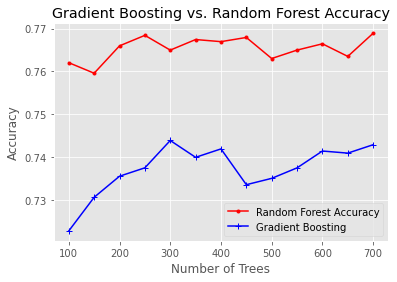

In [37]:
# multiple lines with legend
plt.style.use('ggplot')

x = [100,150,200,250,300,350,400,450,500,550,600,650,700]
y = rf.cv_results_['mean_test_score']
z = clf.cv_results_['mean_test_score']
plt.plot(x,y,marker='.', color='r', label= 'Random Forest Accuracy')
plt.plot(x,z, marker = '+', color = 'b',label = 'Gradient Boosting')
plt.legend()
plt.title("Gradient Boosting vs. Random Forest Accuracy")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy");

## <font color='green'> Web Scraping
* Web scraping using BeautifulSoup: https://www.freecodecamp.org/news/how-to-scrape-websites-with-python-and-beautifulsoup-5946935d93fe/
* Web scraping using Scrapy:https://www.analyticsvidhya.com/blog/2017/07/web-scraping-in-python-using-scrapy/
* Web scrapers: https://www.scraperapi.com/blog/the-10-best-web-scraping-tools (including commercial scrapers)

In [7]:
import requests
from bs4 import BeautifulSoup

# Specify a url
quote_page = 'https://www.uark.edu/academics/majors.php'
    
response = requests.get(quote_page)

# Get the web page in html and convert it to a BeautifulSoup format
soup = BeautifulSoup(response.content, "html.parser")

In [8]:
# Find the address of the part you want to scrap using "inspect" function in your web browser
# For this, the inspection function should be manually enabled in your brower
# Plug the address in "find"

name_box = soup.find('p', {'class' : 'bigCopy'})
name_box
name = name_box.text.strip() # strip() is used to remove spaces at the beginning and at the end of the string
print(name)

Take every opportunity to consult your academic adviser to ensure that you are taking
               advantage of courses and university resources that will help you reach your educational
               and career goals and graduate on time. Remember, the University of Arkansas is committed
               to your success. The faculty and staff are here to support you as you work to achieve
               your goals. Ask for help and advice whenever you need it.


In [9]:
# vectorize the text
ark = [name] 
arkk=vectorizer.transform(ark)
print(arkk)

  (0, 26177)	0.10670255014188623
  (0, 24922)	0.2742356468419891
  (0, 24067)	0.08809776159929004
  (0, 23536)	0.13569244746205605
  (0, 23268)	0.11763109097119513
  (0, 23110)	0.17550255294379383
  (0, 22647)	0.2003495014840388
  (0, 20489)	0.16088957190071135
  (0, 20260)	0.1279406196844749
  (0, 19826)	0.1619647719612395
  (0, 17367)	0.17911143194145013
  (0, 16632)	0.10008246859681677
  (0, 11976)	0.22066793376123095
  (0, 11397)	0.2003495014840388
  (0, 11288)	0.37094702807953417
  (0, 10006)	0.23040216629909357
  (0, 9314)	0.23040216629909357
  (0, 8960)	0.18320284150382815
  (0, 7048)	0.21475043975969652
  (0, 6739)	0.20916409675650494
  (0, 6318)	0.1738459301694142
  (0, 5381)	0.21475043975969652
  (0, 3713)	0.13136979108423694
  (0, 2764)	0.17911143194145013
  (0, 2745)	0.16799198670885754
  (0, 2559)	0.2044409110464168
  (0, 2475)	0.2003495014840388


In [10]:
RFres.predict(arkk)

array([1], dtype=int64)